In [57]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as st

%matplotlib inline
pl.rcParams['figure.figsize'] = (12,3)

In [58]:
data = pd.read_csv('statistics.csv', index_col='Time')
data.tail()

,Population_R,Population_B,CumEaten_R,CumEaten_B,CumDeaths_R,CumDeaths_B
Time,,,,,,
995,54,55,172,157,270,265
996,53,55,172,157,271,266
997,53,54,173,157,271,267
998,54,53,175,157,271,268
999,54,54,175,157,271,268


In [59]:
def confidence_interval(data, n, confidence=0.95):
    m = data.mean()
    # Computing confidence interval using t-statistic
    h = data.std()*st.t.ppf((confidence + 1)/2, n-1)
    left = m-h
    left[left<0] = 0
    return left, m+h

In [60]:
n_experiments = data.groupby(data.index).agg(lambda x: len(x)).max().max()
n_experiments

10

In [104]:
def plot_statistic(data, main_column, n_experiments=n_experiments):
    red_column = main_column + '_R'
    blue_column = main_column + '_B'
    grouped = data.groupby(data.index)
    for column, text, color in zip([red_column, blue_column], [' (Red) ', ' (Blue) '], ['r', 'b']):
        grouped[column].mean().plot(label=main_column + text + '(mean)', color=color, linewidth=1.5)
        left, right = confidence_interval(grouped[column], n_experiments)
        pl.plot(data.index.unique(), right, color=color, linestyle='--', 
                label='95% confidence interval, t-statistic' + text)
        pl.fill_between(data.index.unique(), grouped[column].quantile(0.9),
                    grouped[column].quantile(0.1), alpha=0.2, color=color,
                    label='80% of experiments' + text)
        pl.legend(loc='upper left', fontsize=8)
        pl.ylabel(main_column)
    for  column, text, color in zip([red_column, blue_column], [' (Red) ', ' (Blue) '], ['r', 'b']):
        left, right = confidence_interval(grouped[column], n_experiments)
        pl.plot(data.index.unique(), left, color=color, linestyle='--')

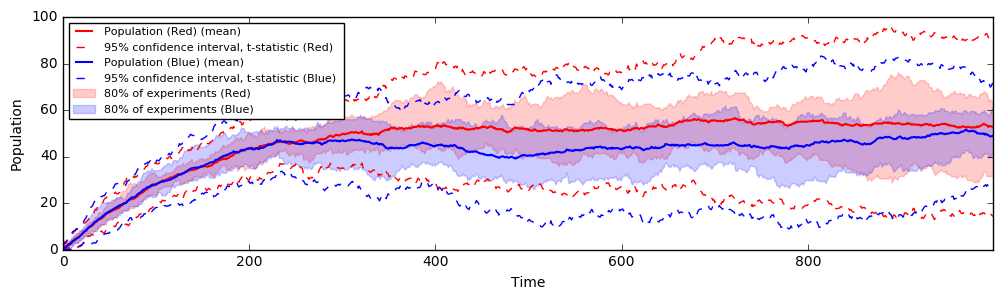

In [105]:
plot_statistic(data, 'Population')

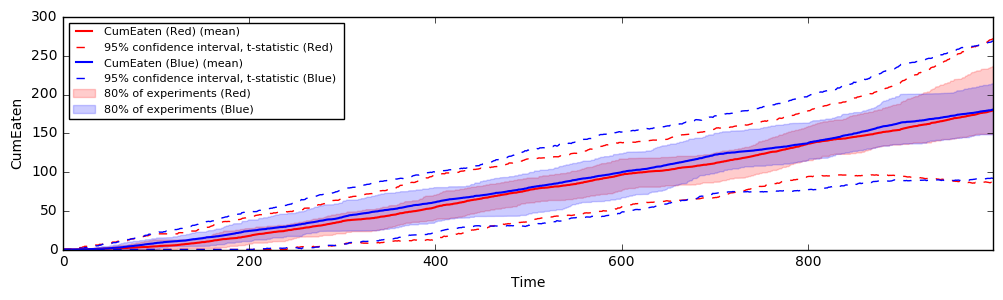

In [106]:
plot_statistic(data, 'CumEaten')

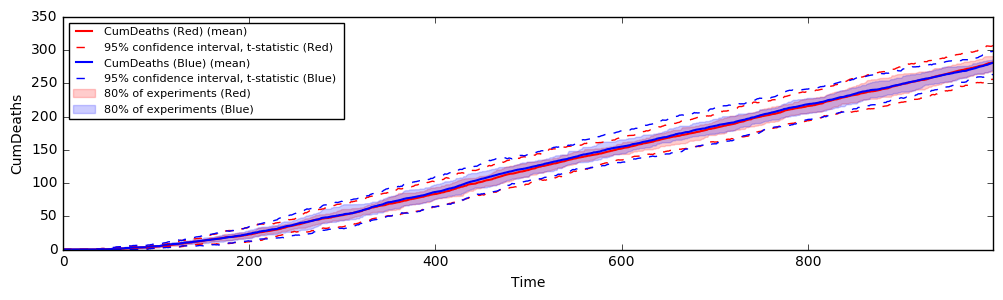

In [109]:
plot_statistic(data, 'CumDeaths')